In [1]:
import pandas as pd

In [20]:
# Load the data from both CSV files
file_path_saka = '../data/processed/saka.csv'  
file_path_banh = '../data/processed/banh.csv'

In [21]:
saka_df = pd.read_csv(file_path_saka)
saka_df['Units'] = pd.to_numeric(saka_df['Units'].astype(str).str.replace(r'\D', ''), errors='coerce')
saka_df.head(5)

,physician,Procedure Code,Procedure Description,Units
0,saka,10060,DRAINAGE OF SKIN ABSCESS,18.0
1,saka,10061,DRAINAGE OF SKIN ABSCESS,5.0
2,saka,10120,REMOVE FOREIGN BODY,1.0
3,saka,10140,DRAINAGE OF HEMATOMA/FLUID,6.0
4,saka,11042,DEB SUBQ TISSUE 20 SQ CM/<,72.0


In [4]:
banh_df = pd.read_csv(file_path_banh)
banh_df['Units'] = pd.to_numeric(banh_df['Units'].astype(str).str.replace(r'\D', ''), errors='coerce')
banh_df.head(5)


,physician,Procedure Code,Procedure Description,Units,Charge
0,banh,10060,DRAINAGE OF SKIN ABSCESS,11.0,"$3,771.40"
1,banh,10120,REMOVE FOREIGN BODY,9.0,"$3,720.60"
2,banh,10140,DRAINAGE OF HEMATOMA/FLUID,3.0,"$1,399.11"
3,banh,11042,DEB SUBQ TISSUE 20 SQ CM/<,36.0,"$12,862.20"
4,banh,11055,TRIM SKIN LESION,49.0,"$9,962.57"


In [22]:
import pandas as pd

# Load the data from both CSV files
# file_path_saka = '../data/processed/saka.csv'  
# file_path_banh = '../data/processed/banh.csv'

# Reading the data
data_saka = pd.read_csv(file_path_saka)
data_banh = pd.read_csv(file_path_banh)

# Converting Units to numeric values for both datasets
data_saka['Units'] = pd.to_numeric(data_saka['Units'], errors='coerce')
data_banh['Units'] = pd.to_numeric(data_banh['Units'], errors='coerce')

# Calculating the total number of procedures for each physician
total_units_saka = data_saka['Units'].sum()
total_units_banh = data_banh['Units'].sum()

# Calculating the average number of procedures per type for each physician
average_units_saka = data_saka['Units'].mean()
average_units_banh = data_banh['Units'].mean()

# Count of unique procedures for each physician
unique_procedures_saka = data_saka['Procedure Code'].nunique()
unique_procedures_banh = data_banh['Procedure Code'].nunique()

# Displaying the results
print(f"Total Units for Dr. Saka: {total_units_saka}")
print(f"Average Units per Procedure for Dr. Saka: {average_units_saka}")
print(f"Unique Procedures for Dr. Saka: {unique_procedures_saka}\n")

print(f"Total Units for Dr. Banh: {total_units_banh}")
print(f"Average Units per Procedure for Dr. Banh: {average_units_banh}")
print(f"Unique Procedures for Dr. Banh: {unique_procedures_banh}")


Total Units for Dr. Saka: 3772.0
Average Units per Procedure for Dr. Saka: 36.26923076923077
Unique Procedures for Dr. Saka: 104

Total Units for Dr. Banh: 5917.0
Average Units per Procedure for Dr. Banh: 85.7536231884058
Unique Procedures for Dr. Banh: 70


Procedure Overlap Analysis: Identify which procedures are unique to each physician and which are common to both. This will help understand the specialization or focus areas of each physician.

In [23]:
# Identifying unique and common procedures
unique_to_saka = set(data_saka['Procedure Code']) - set(data_banh['Procedure Code'])
unique_to_banh = set(data_banh['Procedure Code']) - set(data_saka['Procedure Code'])
common_procedures = set(data_saka['Procedure Code']).intersection(set(data_banh['Procedure Code']))

# Displaying the results
print(f"Procedures unique to Dr. Saka: {unique_to_saka}")
print(f"Procedures unique to Dr. Banh: {unique_to_banh}")
print(f"Procedures common to both: {common_procedures}")


Procedures unique to Dr. Saka: {'27685', '99024', '28232', '28585', '28510', '99215', '27786', '73650', '27632', '99214', '28060', '99231', '99223', '99201', '11421', '28490', '28400', '27792', '99233', '27687', '15853', '11044', '28299', 'J2001', '28470', '11045', '28002', '15277', '28270', '28820', '10061', '29581', '28291', '99205', '20240', '99204', '29445', '20670', '73610', '29515', '99232', '27650', '99211', '28485', '97598', '28041', '93922', nan, '28750', '28122', '76000', '27698', '15271', '28289', '99222', '27690', '99221', '20680', '73630', '27665', '28297', '97605', '28120'}
Procedures unique to Dr. Banh: {'11740', '28310', '28190', '11104', '11106', 'Q4037', 'L2820', '29405', 'L1971', '64450', 'L3260', '11732', 'L2200', 'A5513', 'L2330', '28039', 'L4350', '11102', 'J1100', '17250', 'L5000', 'L1940', 'A4580', 'Q4050', 'L1970', '11420', '12001', 'L2210'}
Procedures common to both: {'10120', 'A5500', '11750', '11057', 'L1902', '11721', '11719', '20550', '99202', '64455', 'L1

In [24]:
import pandas as pd

# Creating dictionaries to map procedure codes to descriptions for each physician
saka_procedure_map = dict(zip(data_saka['Procedure Code'], data_saka['Procedure Description']))
banh_procedure_map = dict(zip(data_banh['Procedure Code'], data_banh['Procedure Description']))

# Function to get procedure code and description
def get_procedure_info(procedure_set, procedure_map):
    return {code: procedure_map.get(code, 'Description Not Available') for code in procedure_set}

# Identifying unique and common procedures
unique_to_saka = set(data_saka['Procedure Code']) - set(data_banh['Procedure Code'])
unique_to_banh = set(data_banh['Procedure Code']) - set(data_saka['Procedure Code'])
common_procedures = set(data_saka['Procedure Code']).intersection(set(data_banh['Procedure Code']))

# Getting procedure information for unique and common procedures
unique_to_saka_info = get_procedure_info(unique_to_saka, saka_procedure_map)
unique_to_banh_info = get_procedure_info(unique_to_banh, banh_procedure_map)
common_procedures_info = get_procedure_info(common_procedures, saka_procedure_map)

# Printing the results
print("Procedures Unique to Dr. Saka:")
for code, description in unique_to_saka_info.items():
    print(f"{code}: {description}")

print("\nProcedures Unique to Dr. Banh:")
for code, description in unique_to_banh_info.items():
    print(f"{code}: {description}")

print("\nProcedures Common to Both:")
for code, description in common_procedures_info.items():
    print(f"{code}: {description}")


Procedures Unique to Dr. Saka:
27685: REVISION OF LOWER LEG TENDON
99024: POST OP VISIT
28232: INCISION OF TOE TENDON
28585: REPAIR FOOT DISLOCATION
28510: TREATMENT OF TOE FRACTURE
99215: Established patient office or other outpatient, visit typically 40 minutes
27786: TREATMENT OF ANKLE FRACTURE
73650: X-RAY EXAM OF HEEL
27632: EXC LEG/ANKLE LES SC 3 CM/>
99214: Established patient office or other outpatient, visit typically 25 minutes
28060: PARTIAL REMOVAL FOOT FASCIA
99231: Subsequent hospital inpatient care, typically 15 minutes per day
99223: Initial hospital inpatient care, typically 70 minutes per day
99201: New patient office or other outpatient visit, typically 10 minutes
11421: EXC H-F-NK-SP B9+MARG 0.6-1
28490: TREAT BIG TOE FRACTURE
28400: TREATMENT OF HEEL FRACTURE
27792: TREATMENT OF ANKLE FRACTURE
99233: Subsequent hospital inpatient care, typically 35 minutes per day
27687: REVISION OF CALF TENDON
15853:  
11044: DEB BONE 20 SQ CM/<
28299: CORRECTION HALLUX VALGUS
J20

In [25]:
import pandas as pd

# Creating dictionaries to map procedure codes to descriptions for each physician
saka_procedure_map = dict(zip(data_saka['Procedure Code'], data_saka['Procedure Description']))
banh_procedure_map = dict(zip(data_banh['Procedure Code'], data_banh['Procedure Description']))

# Identifying unique and common procedures
unique_to_saka = set(data_saka['Procedure Code']) - set(data_banh['Procedure Code'])
unique_to_banh = set(data_banh['Procedure Code']) - set(data_saka['Procedure Code'])
common_procedures = set(data_saka['Procedure Code']).intersection(set(data_banh['Procedure Code']))

# Function to get procedure code and description
def get_procedure_info(procedure_set, procedure_map):
    return {code: procedure_map.get(code, 'Description Not Available') for code in procedure_set}

# Getting procedure information for unique and common procedures
unique_to_saka_info = get_procedure_info(unique_to_saka, saka_procedure_map)
unique_to_banh_info = get_procedure_info(unique_to_banh, banh_procedure_map)
common_procedures_info = get_procedure_info(common_procedures, saka_procedure_map)

# Creating dataframes to hold the detailed information
df_unique_to_saka = pd.DataFrame(list(unique_to_saka_info.items()), columns=['Procedure Code', 'Description'])
df_unique_to_banh = pd.DataFrame(list(unique_to_banh_info.items()), columns=['Procedure Code', 'Description'])
df_common_procedures = pd.DataFrame(list(common_procedures_info.items()), columns=['Procedure Code', 'Description'])

# Displaying the dataframes
df_unique_to_saka, df_unique_to_banh, df_common_procedures


(   Procedure Code                   Description
 0           27685  REVISION OF LOWER LEG TENDON
 1           99024                 POST OP VISIT
 2           28232        INCISION OF TOE TENDON
 3           28585       REPAIR FOOT DISLOCATION
 4           28510     TREATMENT OF TOE FRACTURE
 ..            ...                           ...
 58          73630            X-RAY EXAM OF FOOT
 59          27665     REPAIR OF LEG TENDON EACH
 60          28297      CORRECTION HALLUX VALGUS
 61          97605   NEG PRESS WOUND TX </=50 CM
 62          28120    PART REMOVAL OF ANKLE/HEEL
 
 [63 rows x 2 columns],
    Procedure Code                   Description
 0           11740   DRAIN BLOOD FROM UNDER NAIL
 1           28310           REVISION OF BIG TOE
 2           28190  REMOVAL OF FOOT FOREIGN BODY
 3           11104                              
 4           11106                              
 5           Q4037     Cast sup shrt leg plaster
 6           L2820  Soft interface below kn

In [26]:
# Define file paths for the new CSV files
output_path_unique_saka = '../reports/csv/unique_procedures_saka.csv'  # Change the path as needed
output_path_unique_banh = '../reports/csv/unique_procedures_banh.csv'  # Change the path as needed

# Save the dataframes to CSV files
df_unique_to_saka.to_csv(output_path_unique_saka, index=False)
df_unique_to_banh.to_csv(output_path_unique_banh, index=False)

print("Dataframes saved as CSV files.")

Dataframes saved as CSV files.


In [27]:
# Creating dictionaries to map procedure codes to descriptions for each physician
saka_procedure_map = dict(zip(data_saka['Procedure Code'], data_saka['Procedure Description']))
banh_procedure_map = dict(zip(data_banh['Procedure Code'], data_banh['Procedure Description']))

# Identifying unique and common procedures
common_procedures = set(data_saka['Procedure Code']).intersection(set(data_banh['Procedure Code']))

# Counting occurrences of each procedure for both physicians
count_saka = data_saka['Procedure Code'].value_counts()
count_banh = data_banh['Procedure Code'].value_counts()

# Function to get procedure code and description
def get_procedure_info(procedure_set, procedure_map):
    return {code: procedure_map.get(code, 'Description Not Available') for code in procedure_set}

# Getting procedure information for common procedures
common_procedures_info = get_procedure_info(common_procedures, saka_procedure_map)

# Creating a dataframe for common procedures
df_common_procedures = pd.DataFrame(list(common_procedures_info.items()), columns=['Procedure Code', 'Description'])
df_common_procedures['count_saka'] = df_common_procedures['Procedure Code'].map(count_saka)
df_common_procedures['count_banh'] = df_common_procedures['Procedure Code'].map(count_banh)

df_common_procedures
output_path_common = '../reports/csv/common_procedures.csv'  # Change the path as needed
df_common_procedures.to_csv(output_path_common, index=False)

The Frequency Distribution Analysis for each physician now includes the procedure descriptions. This enhanced analysis shows:

Procedure Code: The code for each procedure.
Frequency_Saka: The number of times Dr. Saka performed each procedure.
Frequency_Banh: The number of times Dr. Banh performed each procedure.
Description: The description of each procedure.
This detailed view provides insights into the practice patterns of both physicians, highlighting their specializations and preferences based on the frequency of each procedure they perform.

In [28]:
# Reading the data
data_saka = pd.read_csv(file_path_saka)
data_banh = pd.read_csv(file_path_banh)

# Counting the frequency of each procedure for both physicians
frequency_saka = data_saka['Procedure Code'].value_counts().reset_index()
frequency_saka.columns = ['Procedure Code', 'Frequency_Saka']

frequency_banh = data_banh['Procedure Code'].value_counts().reset_index()
frequency_banh.columns = ['Procedure Code', 'Frequency_Banh']

# Merging the frequencies for side by side comparison
frequency_comparison = pd.merge(frequency_saka, frequency_banh, on='Procedure Code', how='outer')
frequency_comparison.fillna(0, inplace=True)  # Replace NaN with 0 for procedures not performed by one of them

# Getting procedure descriptions from both datasets
description_saka = data_saka.drop_duplicates(subset='Procedure Code').set_index('Procedure Code')['Procedure Description']
description_banh = data_banh.drop_duplicates(subset='Procedure Code').set_index('Procedure Code')['Procedure Description']

# Merging the descriptions with the frequency data
frequency_comparison['Description'] = frequency_comparison['Procedure Code'].map(description_saka.combine_first(description_banh))

frequency_comparison

output_path_frequency = '../reports/csv/frequency.csv'  
frequency_comparison.to_csv(output_path_frequency, index=False)

## Visualizations

Bar Chart: A side-by-side bar chart would be an excellent choice to compare the frequencies of each procedure between the two physicians. Each procedure code would be on the x-axis, with two bars for each code representing Dr. Saka and Dr. Banh.

Stacked Bar Chart: This variation of a bar chart can show the total frequency of each procedure along with the contribution from each physician, providing a quick comparison of their relative activity per procedure.

Heatmap: If there are many procedures, a heatmap can be a good way to visualize the data. In a heatmap, the procedure codes would be on one axis, the physicians on the other, and the color intensity would represent the frequency.

Bubble Chart: This could be a more visually engaging way to represent the data, where the size of the bubble indicates the frequency of each procedure, positioned according to the physician.

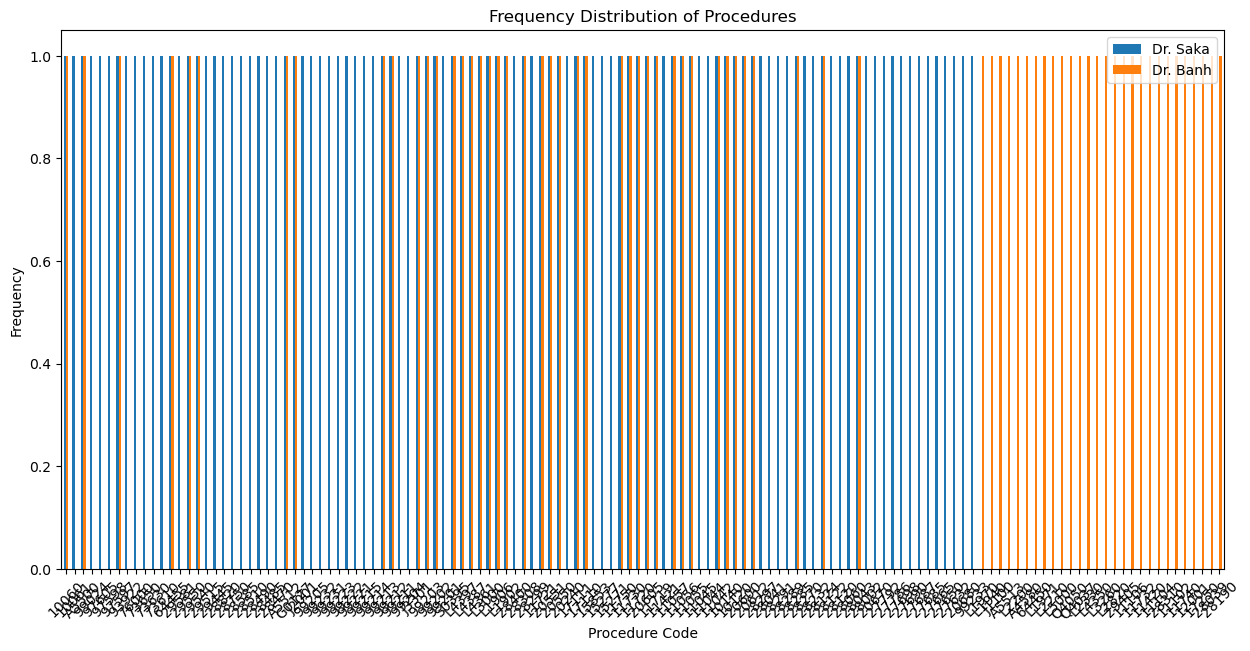

In [19]:
# Here is an example of how you can create a side-by-side bar chart
import matplotlib.pyplot as plt

# Assuming 'frequency_comparison' is your DataFrame
frequency_comparison.plot(x='Procedure Code', y=['Frequency_Saka', 'Frequency_Banh'], kind='bar', figsize=(15, 7))

plt.title('Frequency Distribution of Procedures')
plt.xlabel('Procedure Code')
plt.ylabel('Frequency')
plt.legend(['Dr. Saka', 'Dr. Banh'])
plt.xticks(rotation=45)
plt.show()


In [30]:
import pandas as pd

# Sum of 'Units' for each procedure for both doctors
sum_procedures_saka = data_saka.groupby('Procedure Code')['Units'].sum().reset_index()
sum_procedures_banh = data_banh.groupby('Procedure Code')['Units'].sum().reset_index()

# Merging the sums and adding descriptions
comparison_df = pd.merge(sum_procedures_saka, sum_procedures_banh, on='Procedure Code', how='outer', suffixes=('_Saka', '_Banh'))
comparison_df.fillna(0, inplace=True)  # Replace NaN with 0
comparison_df['Description'] = comparison_df['Procedure Code'].map(description_saka.combine_first(description_banh))

# Save the DataFrame to a CSV file
output_csv_path = '../reports/csv/procedure_comparison.csv'  # Change the path as needed
comparison_df.to_csv(output_csv_path, index=False)